# Analyzing the effect of various factors on wine quality

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


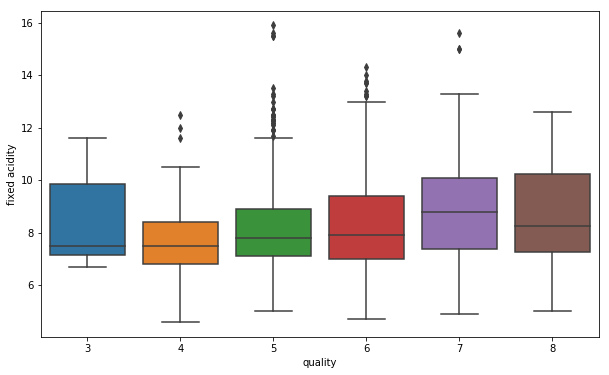

In [5]:
#Creating boxplots help understand the variation of quality caused by each factor
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'fixed acidity', data = wine)

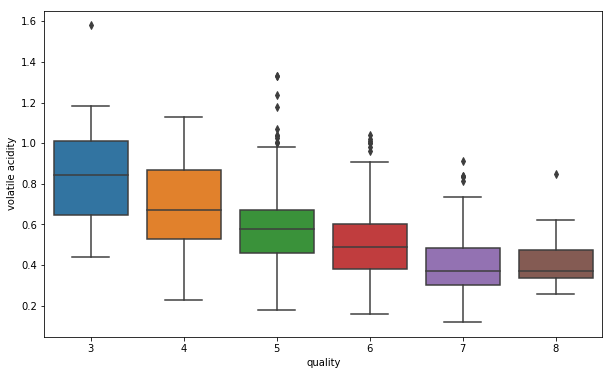

In [6]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = wine)

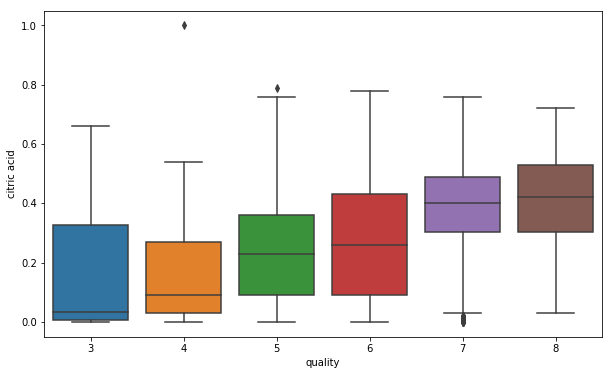

In [7]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'citric acid', data = wine)

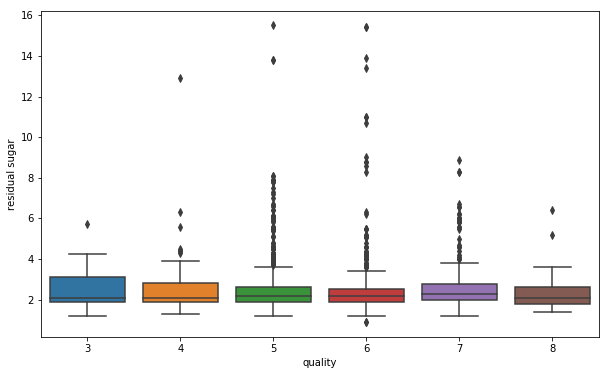

In [8]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'residual sugar', data = wine)

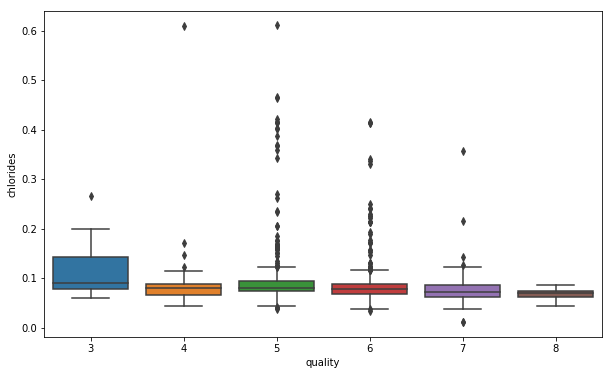

In [9]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'chlorides', data = wine)

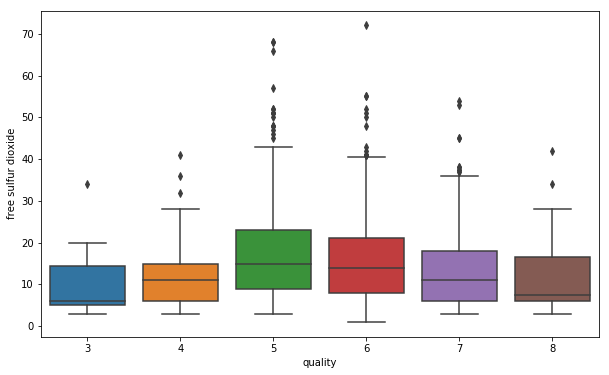

In [10]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

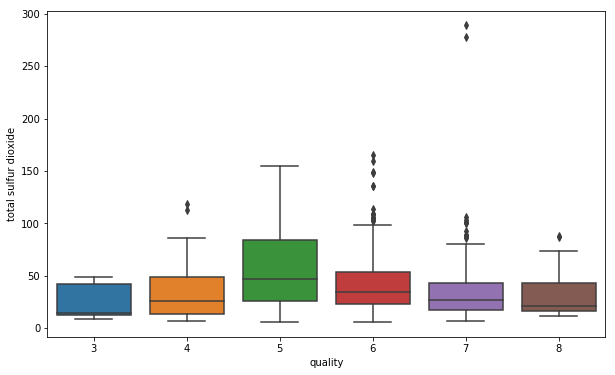

In [11]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

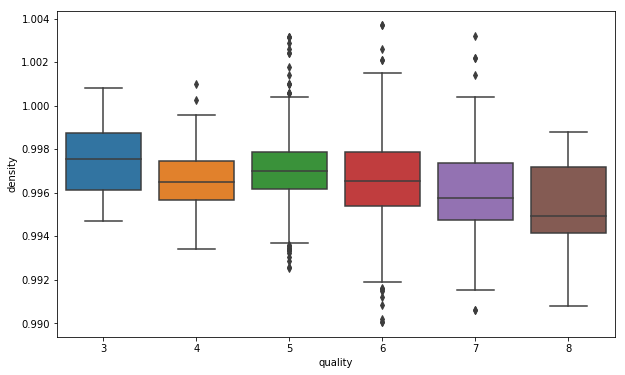

In [12]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'density', data = wine)

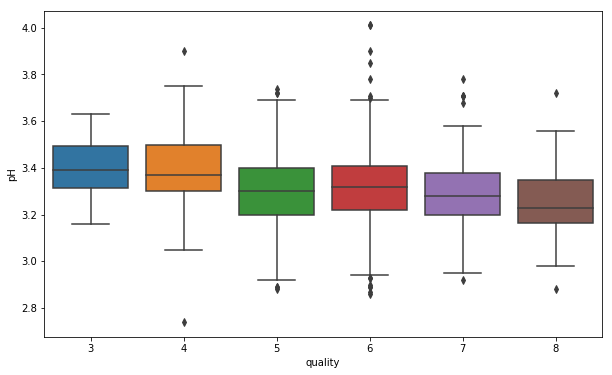

In [13]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'pH', data = wine)

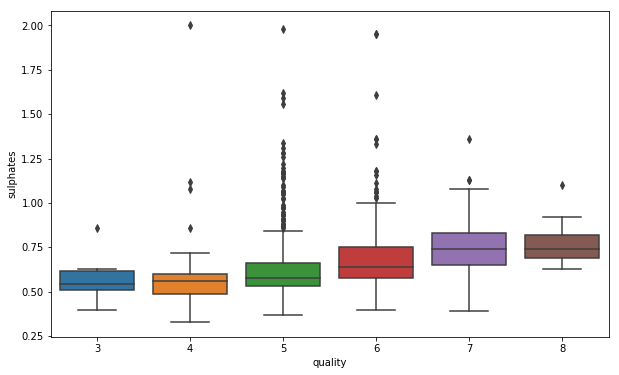

In [14]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'sulphates', data = wine)

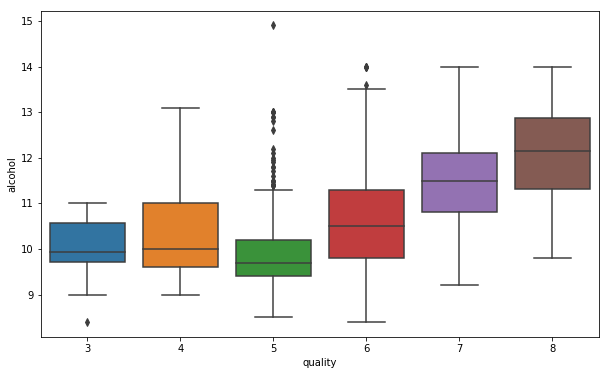

In [15]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'alcohol', data = wine)

In [16]:
wine['review'] = np.where(wine['quality'] >= 7, 1, 0)

In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [18]:
x = wine.drop(['quality', 'review'], axis = 1)
y = wine['review']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.88
[[273   3]
 [ 36   8]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       276
           1       0.73      0.18      0.29        44

   micro avg       0.88      0.88      0.88       320
   macro avg       0.81      0.59      0.61       320
weighted avg       0.86      0.88      0.85       320



C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Random forest has the highest accuracy (0.92)

Accuracy of logistic regression classifier on test set: 0.92
[[269   7]
 [ 18  26]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       276
           1       0.79      0.59      0.68        44

   micro avg       0.92      0.92      0.92       320
   macro avg       0.86      0.78      0.82       320
weighted avg       0.92      0.92      0.92       320



In [22]:
#SVM
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.89
[[275   1]
 [ 35   9]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       276
           1       0.90      0.20      0.33        44

   micro avg       0.89      0.89      0.89       320
   macro avg       0.89      0.60      0.64       320
weighted avg       0.89      0.89      0.86       320



C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
